In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('C:/Users/Divit/Desktop/Udemy/Tensorflow/TF_2_Notebooks_and_Data/DATA/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [ ]:
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [ ]:
len(df)

334

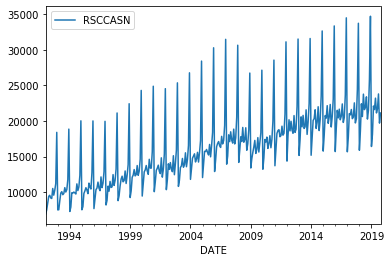

In [ ]:
df.plot()

In [ ]:
test_len=18

In [ ]:
test_index=int(len(df)-test_len)

In [ ]:
train_data=df[:test_index]
test_data=df[test_index:]

In [ ]:
len(train_data)

316

In [ ]:
len(test_data)

18

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(train_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train=scaler.transform(train_data)
scaled_test=scaler.transform(test_data)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length=12


In [ ]:
train_generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
test_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [ ]:
X,Y=train_generator[0]

In [ ]:
Y

array([[0.02047633]])

In [ ]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
n_features=1

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(120,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit_generator(train_generator,epochs=10,validation_data=test_generator,callbacks=[early_stop])

Epoch 1/10
304/304 [==============================] - 14s 45ms/step - loss: 0.0257 - val_loss: 0.0041
Epoch 2/10
304/304 [==============================] - 17s 54ms/step - loss: 0.0171 - val_loss: 0.0308
Epoch 3/10
304/304 [==============================] - 15s 50ms/step - loss: 0.0103 - val_loss: 0.0033
Epoch 4/10
304/304 [==============================] - 18s 60ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 5/10
304/304 [==============================] - 15s 49ms/step - loss: 0.0038 - val_loss: 7.5387e-04
Epoch 6/10
304/304 [==============================] - 16s 52ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7/10
304/304 [==============================] - 17s 57ms/step - loss: 0.0014 - val_loss: 6.8495e-04
Epoch 8/10
304/304 [==============================] - 16s 54ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 9/10
304/304 [==============================] - 15s 48ms/step - loss: 0.0015 - val_loss: 0.0015


In [ ]:
losses=pd.DataFrame(model.history.history)

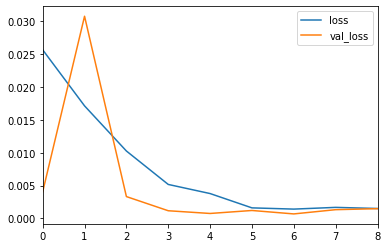

In [ ]:
losses.plot()

In [ ]:
test_predictions=[]

first_batch=scaled_train[-length:]
current_batch=first_batch.reshape((1,length,n_features))

for i in range(len(test_data)):
    predictions=model.predict(current_batch)[0]
    test_predictions.append(predictions)
    current_batch=np.append(current_batch[:,1:,:],[[predictions]],axis=1)

In [ ]:
test_predictions=scaler.inverse_transform(test_predictions)

In [ ]:
test_data['predictions']=test_predictions

c:\users\divit\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_data.columns=[['TRUE VALUES','PREDICTIONS']]

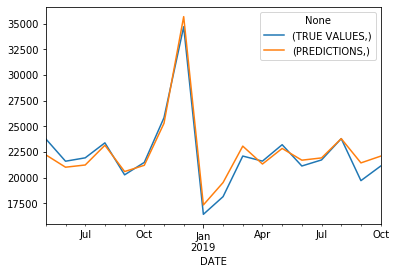

In [ ]:
test_data.plot()

In [ ]:
####PREDICTING NEW VALUES INTO THE FUTURE#####

In [ ]:
full_scaler=MinMaxScaler()

In [ ]:
full_scaler.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
df_scaled=full_scaler.transform(df)

In [ ]:
full_generator=TimeseriesGenerator(df_scaled,df_scaled,length=12,batch_size=1)

In [ ]:
full_model=Sequential()

In [ ]:
full_model.add(LSTM(240,activation='relu',input_shape=(12,1)))
full_model.add(Dense(1))

full_model.compile(optimizer='adam',loss='mse')

In [ ]:
full_model.fit_generator(full_generator,epochs=7,verbose=1)

Epoch 1/7
322/322 [==============================] - 19s 58ms/step - loss: 0.0231
Epoch 2/7
322/322 [==============================] - 18s 55ms/step - loss: 0.0113
Epoch 3/7
322/322 [==============================] - 18s 56ms/step - loss: 0.0096
Epoch 4/7
322/322 [==============================] - 18s 57ms/step - loss: 0.0022
Epoch 5/7
322/322 [==============================] - 20s 61ms/step - loss: 0.0018
Epoch 6/7
322/322 [==============================] - 19s 59ms/step - loss: 0.0011
Epoch 7/7
322/322 [==============================] - 17s 52ms/step - loss: 0.0016


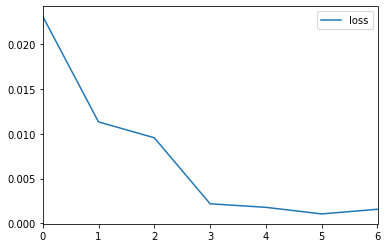

In [ ]:
loss=pd.DataFrame(full_model.history.history).plot()

In [ ]:
forecast=[]

first_batch=df_scaled[-12:]
cur_batch=first_batch.reshape((1,12,1))

for x in range(12):
    predict_made=full_model.predict(cur_batch)[0]
    forecast.append(predict_made)
    cur_batch=np.append(cur_batch[:,1:,:],[[predict_made]],axis=1)

In [ ]:
forecast=full_scaler.inverse_transform(forecast)

In [ ]:
date_index=pd.date_range(start='2019-11-1',freq='MS',periods=12)

In [ ]:
date_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
predict_df=pd.DataFrame(forecast,index=date_index,columns=['FUTURE PREDICTIONS'])

(562, 610)

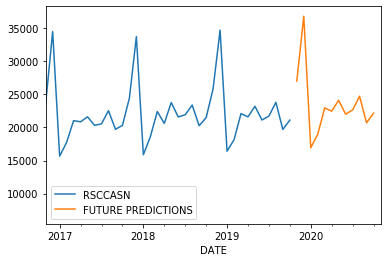

In [ ]:
x=df.plot()
predict_df.plot(ax=x)
plt.xlim('2016-11-01','2020-11-01')